## VISUALIZATION of intrahemisphere connectivity

Similar to corpus callosum. Visualize relationships between extracted MRI variables and cognitive values.

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import glob
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce

In [11]:
# Load the csv

csv_cc = f'/home/extop/GERARD/DATA/MAGNIMS2021/cc.csv'
csv_hemis = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_intrainter_cort_G_SC.csv'
csv_hemis_FC = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_G_FC.csv'
csv_hemis_cl = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_CLINIC_og_G_SC.csv'
csv_hemis_nodes = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_nodes_SC.csv'
csv_total = '/home/extop/GERARD/DATA/MAGNIMS2021/data_total.csv'

df_cc = pd.read_csv(csv_cc)
df_hemis = pd.read_csv(csv_hemis)
df_hemis_FC = pd.read_csv(csv_hemis_FC)
df_hemis_cl = pd.read_csv(csv_hemis_cl)
df_hemis_nodes = pd.read_csv(csv_hemis_nodes)
df_total = pd.read_csv(csv_total)

In [12]:
# merge results and total
data_frames = [df_total, df_cc, df_hemis, df_hemis_FC]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["SubjID", "CENTER"]), data_frames)
df_merged = df_merged[df_merged.QC == "Y"]

data_frames = [df_total, df_cc, df_hemis_cl]
df_merged_cl = reduce(lambda  left,right: pd.merge(left,right,on=["SubjID", "CENTER"]), data_frames)
df_merged_cl = df_merged_cl[df_merged_cl.QC == "Y"]


print(df_merged["GROUP"].describe())
df_merged.head()

count      725
unique       5
top       RRMS
freq       366
Name: GROUP, dtype: object


,SubjID,DOB,SEX,GROUP,ONSET_DATE,MR_DATE,TREATMENT_AT_MRI,TREATMENT,EDSS,YED,...,SC_L_avg_spl,SC_R_avg_spl,SC_inter_avg_spl,Unnamed: 0_y,FC_L_avg_spl,FC_L_efficiency,FC_R_avg_spl,FC_R_efficiency,FC_inter_avg_spl,FC_inter_efficiency
0,FIS_028,01/12/1977,F,RRMS,01/07/2003,04/10/2016,Y,Interferon,2.5,>17 years,...,0.014059,0.014492,0.021716,-1,0.872043,1.255914,0.931183,1.137634,0.899524,1.200952
1,FIS_029,24/04/1970,F,RRMS,01/05/1995,31/08/2016,Y,Interferon,1.0,>17 years,...,0.012396,0.012400,0.018858,-1,0.900000,1.200000,0.884946,1.230108,0.896087,1.207827
2,FIS_041,15/04/1949,F,RRMS,15/02/1976,23/09/2016,N,NONE,6.0,0-8 years,...,0.013099,0.011449,0.023083,-1,0.872043,1.255914,0.866667,1.266667,0.860127,1.279746
3,FIS_047,04/07/1951,M,RRMS,14/04/2003,15/10/2016,Y,Glatiramer,3.5,0-12 years,...,0.014694,0.015381,0.022342,-1,0.800000,1.400000,0.830824,1.344086,0.801340,1.397673
4,FIS_048,09/10/1966,F,RRMS,01/08/1989,29/10/2016,Y,Interferon,2.0,0-12 years,...,0.012597,0.011709,0.018864,-1,0.915054,1.169892,0.850538,1.298925,0.875992,1.248017


/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/exto

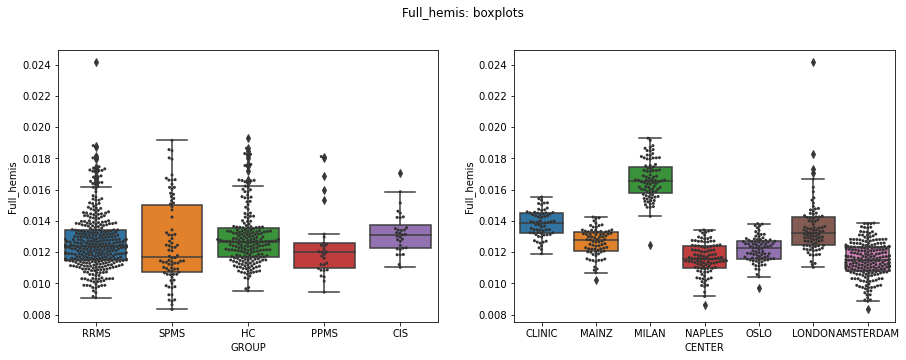

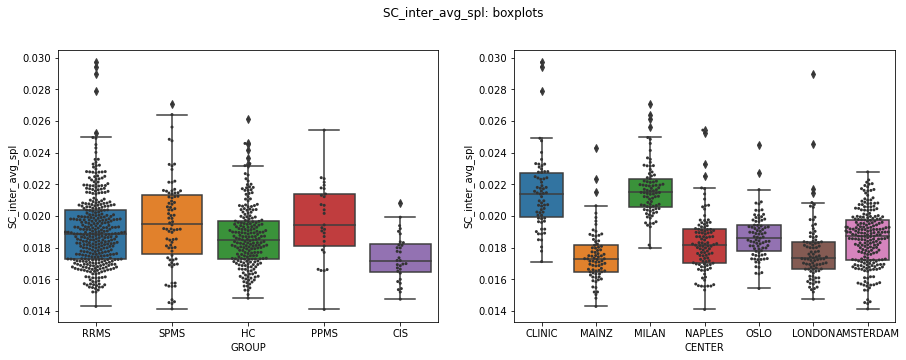

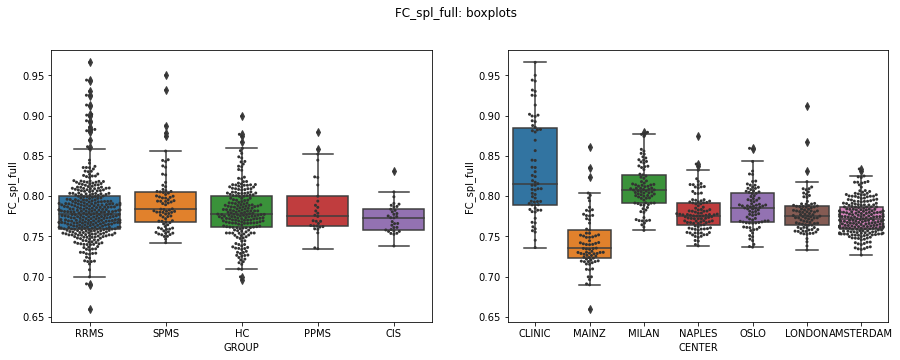

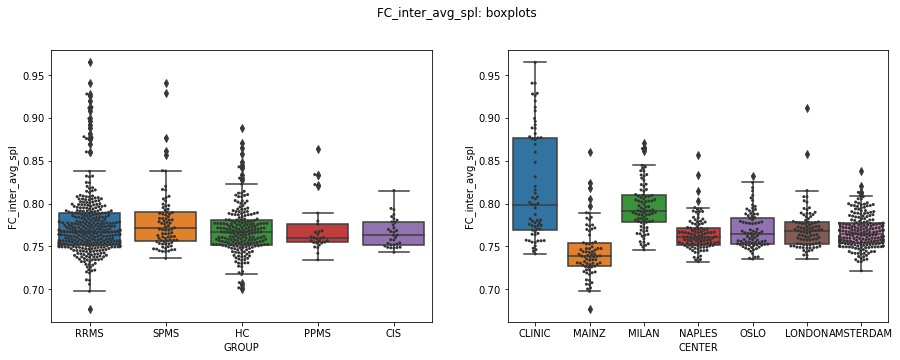

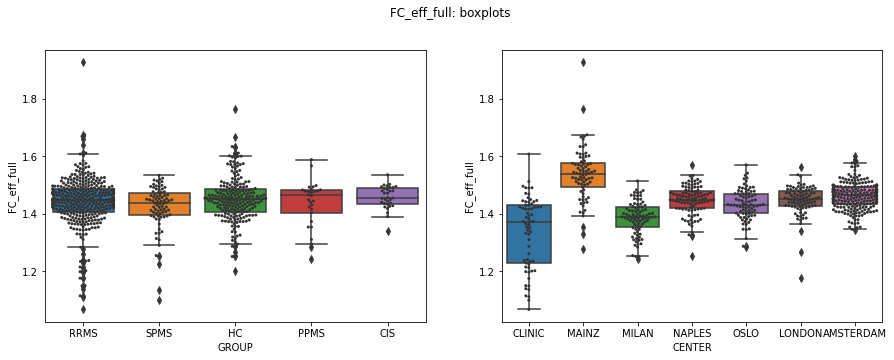

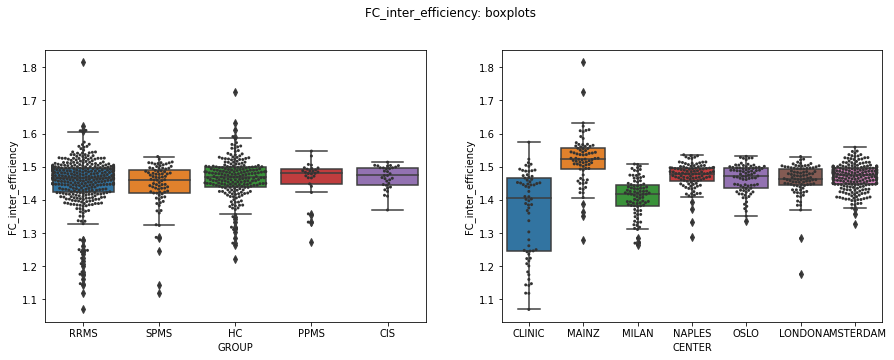

In [13]:
## Boxplots center and diagnosis
## Do for all the CC values
df_merged["Full_hemis"] = ( df_merged["SC_L_avg_spl"] + df_merged["SC_R_avg_spl"] ) / 2
df_merged["FC_spl_full"] = ( df_merged["FC_L_avg_spl"] + df_merged["FC_R_avg_spl"] ) / 2
df_merged["FC_eff_full"] = ( df_merged["FC_L_efficiency"] + df_merged["FC_R_efficiency"] ) / 2

list_of_values = ["Full_hemis", "SC_inter_avg_spl", "FC_spl_full", "FC_inter_avg_spl", "FC_eff_full", "FC_inter_efficiency"]

for cc in list_of_values:

    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,5))
    plt.suptitle(f"{cc}: boxplots", y=1.0)
    sns.boxplot(data=df_merged, x="GROUP", y=f"{cc}", ax=ax1)
    sns.swarmplot(data=df_merged, x="GROUP", y=f"{cc}", ax=ax1, color=".2", size=3)

    sns.boxplot(data=df_merged, x="CENTER", y=f"{cc}", ax=ax2)
    sns.swarmplot(data=df_merged, x="CENTER", y=f"{cc}", ax=ax2, color=".2", size=3)

/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


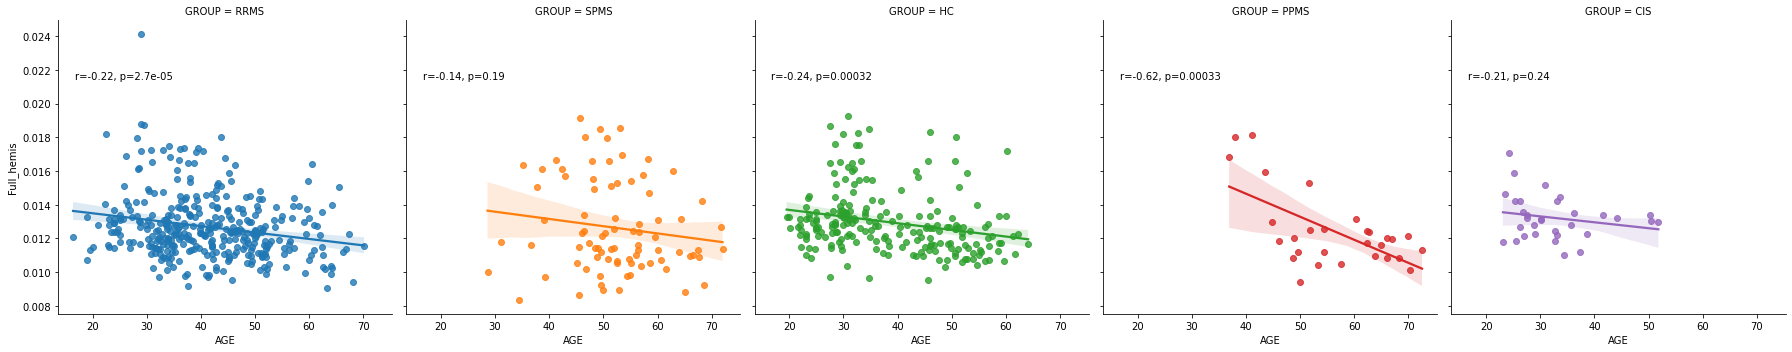

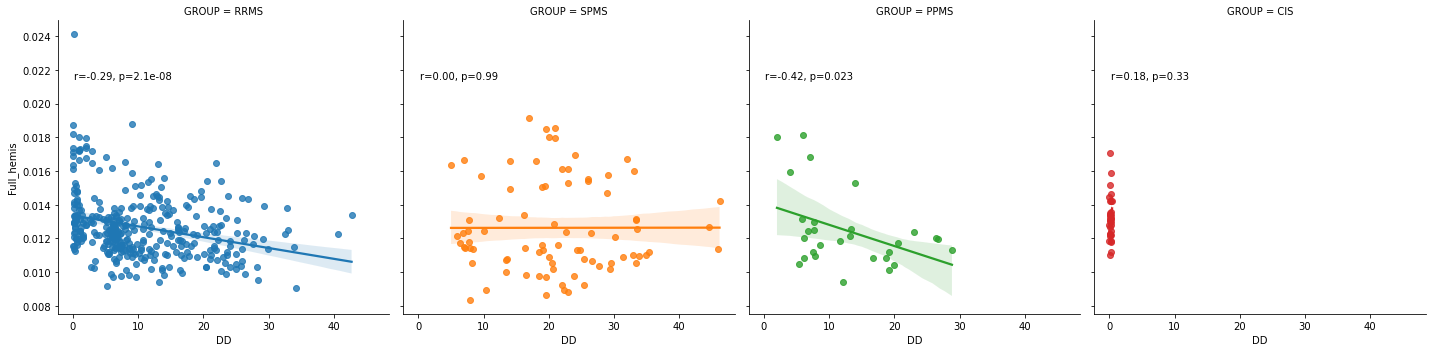

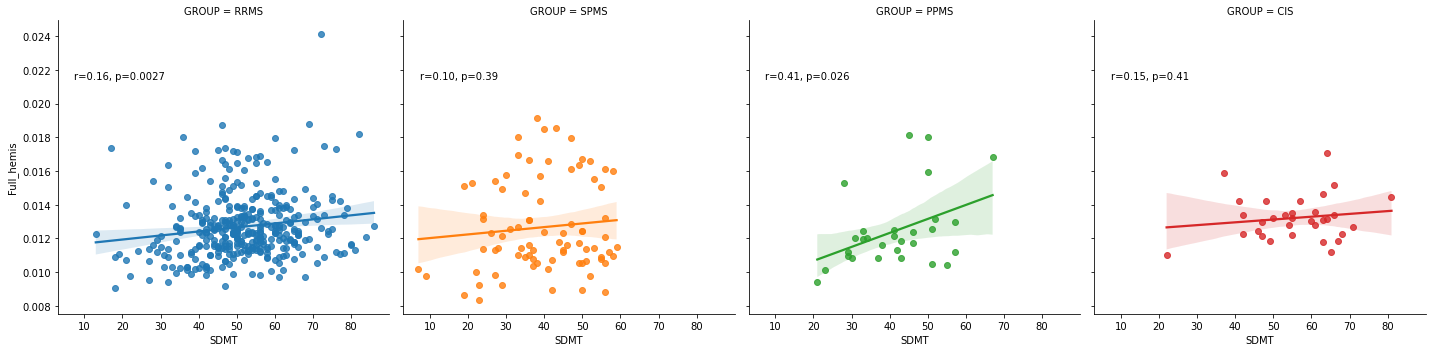

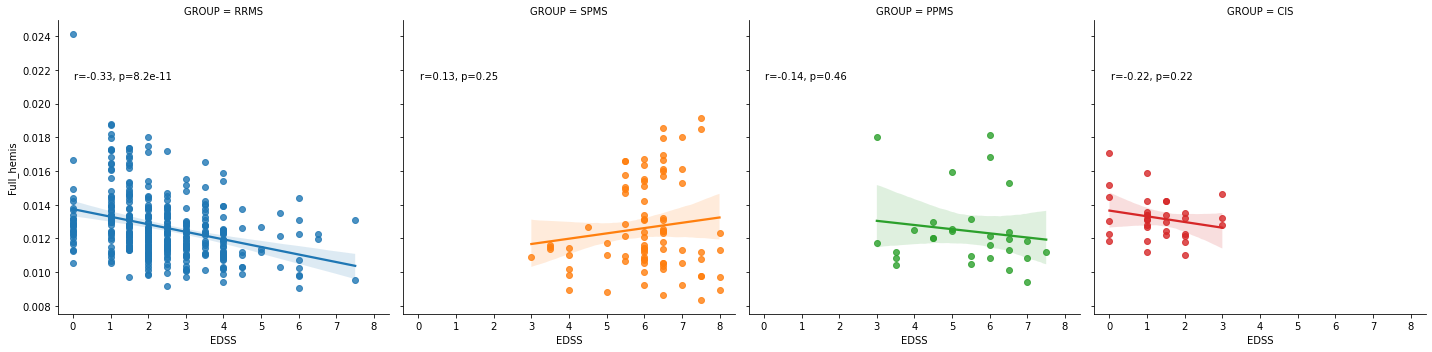

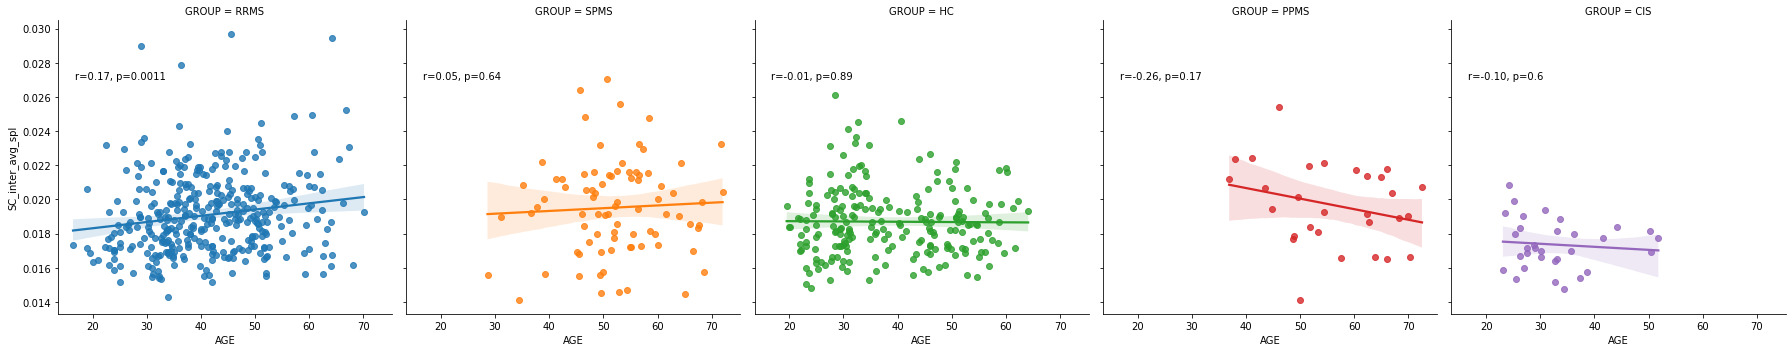

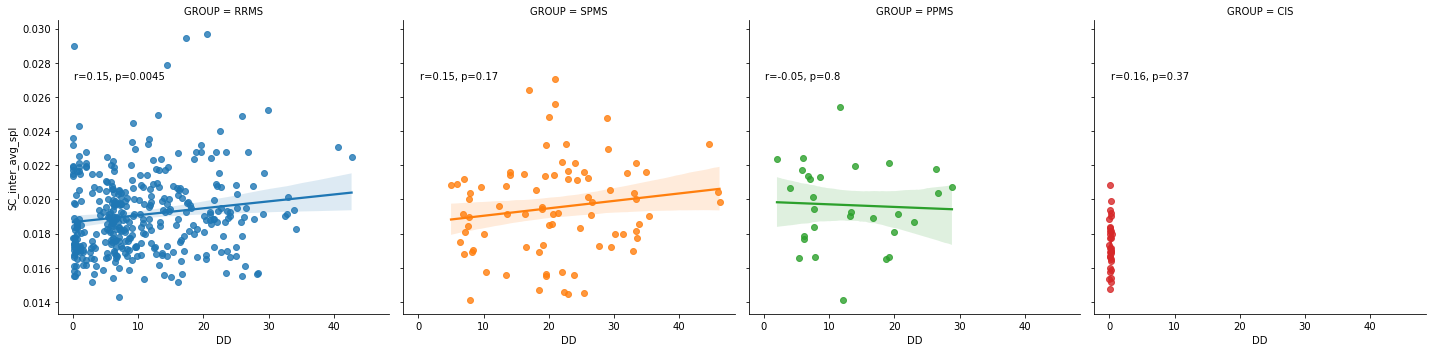

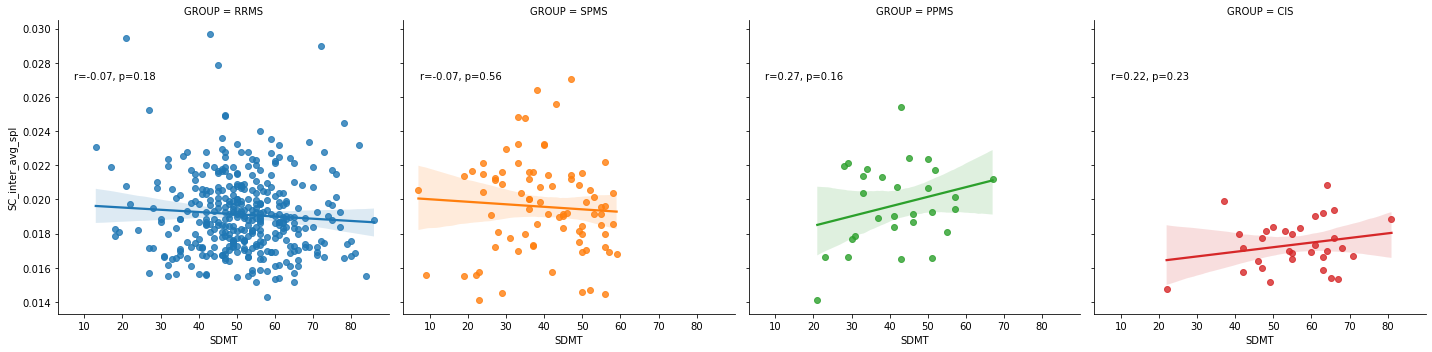

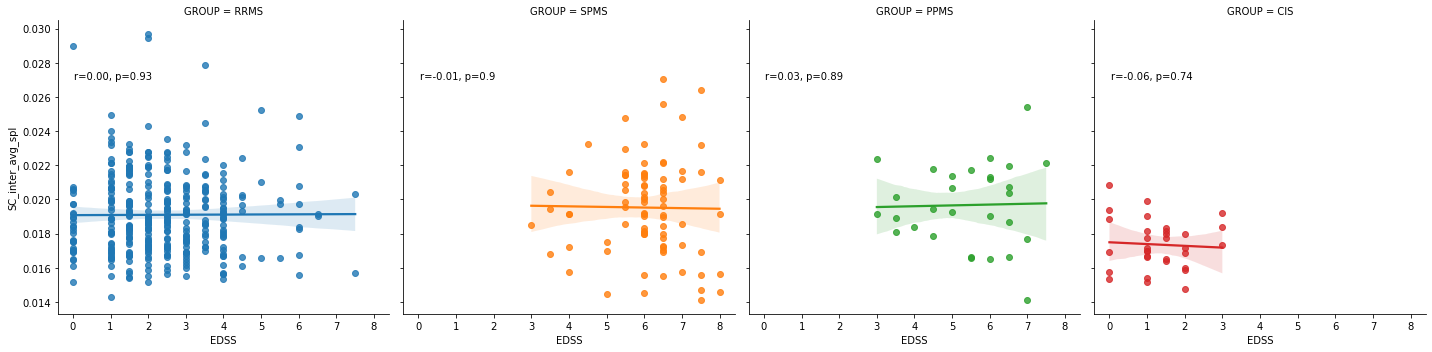

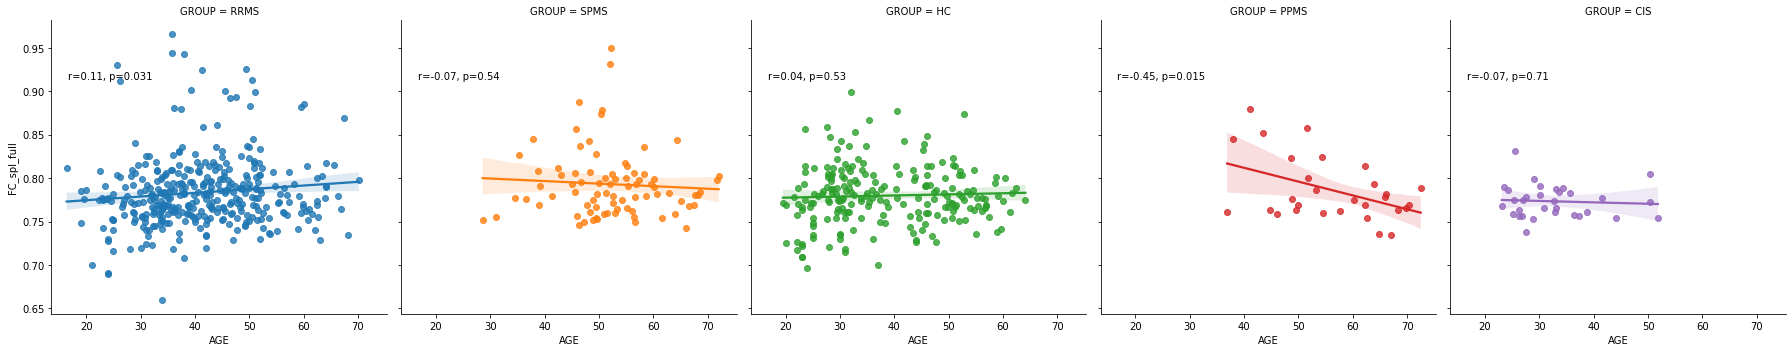

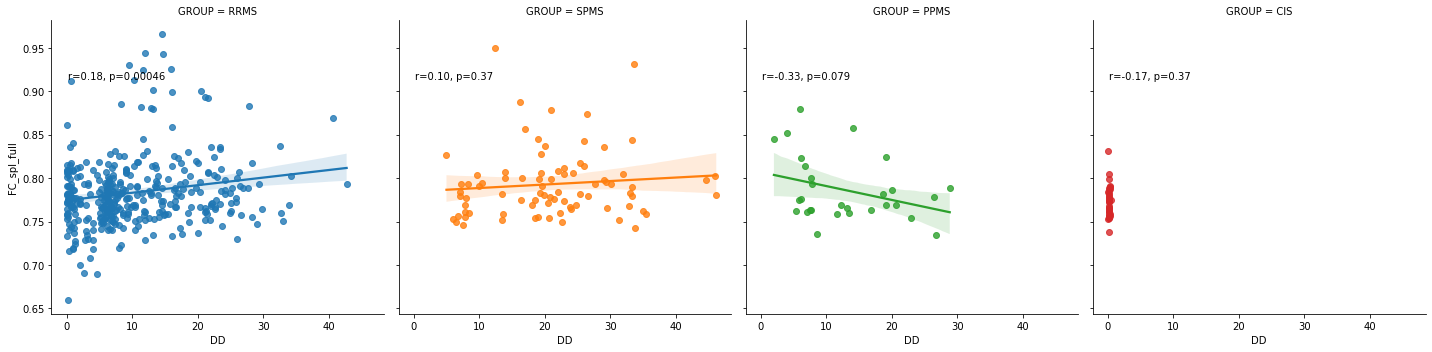

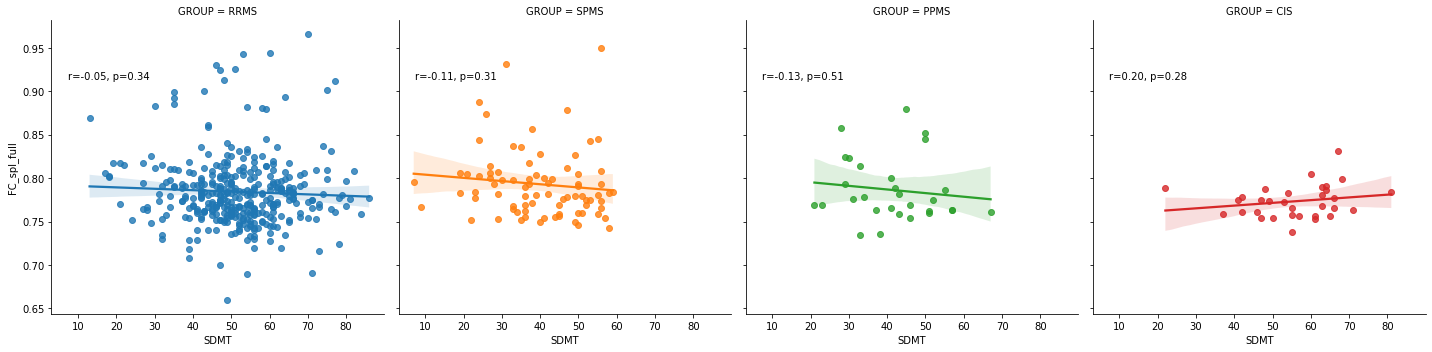

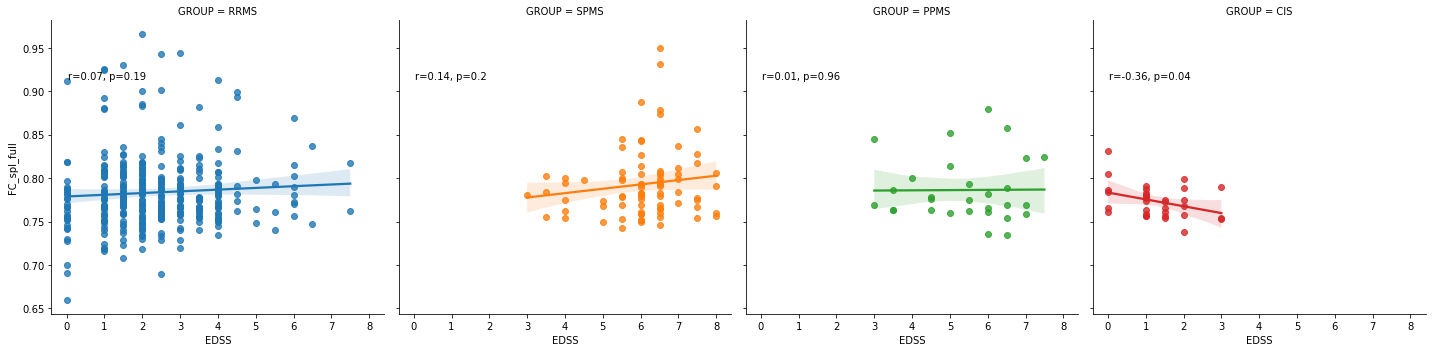

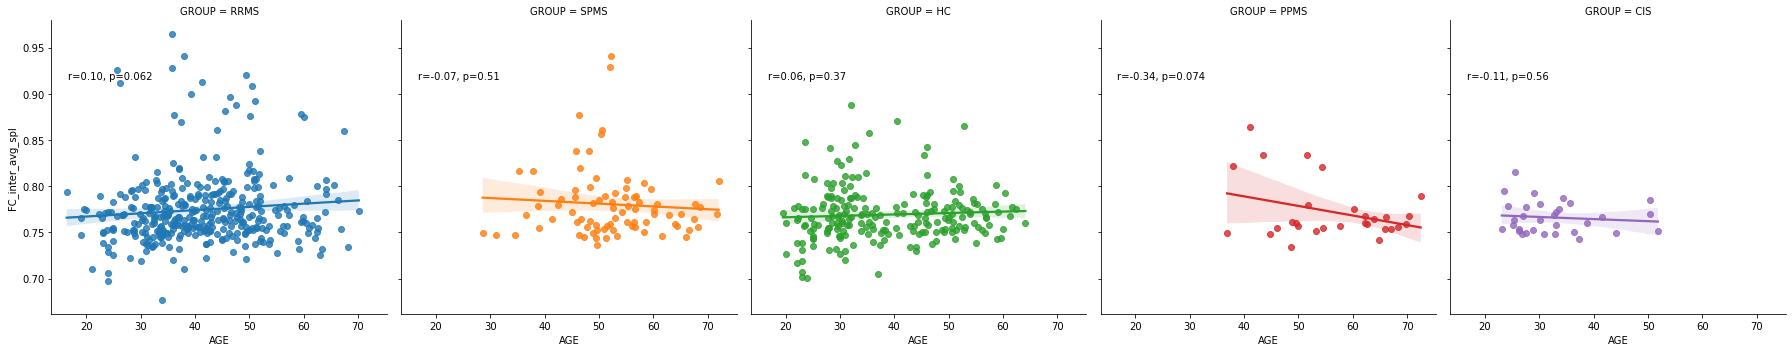

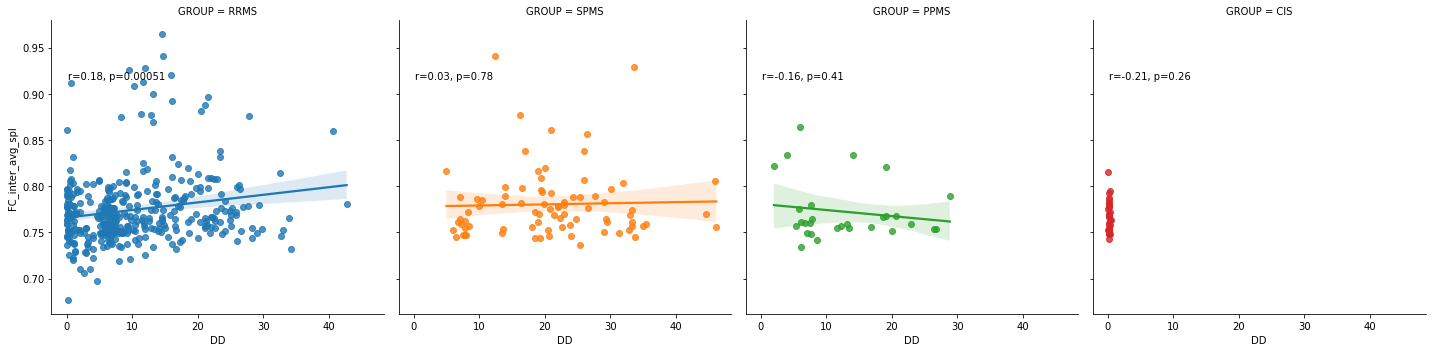

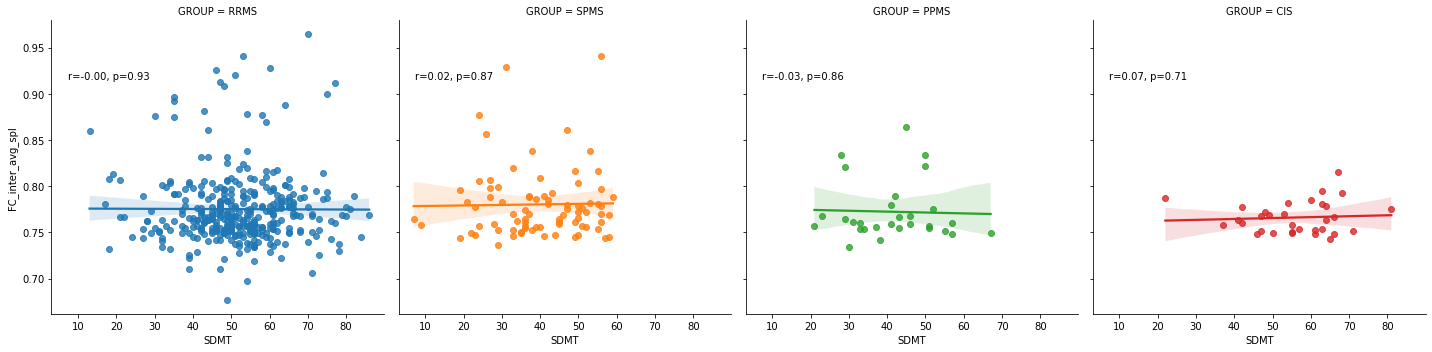

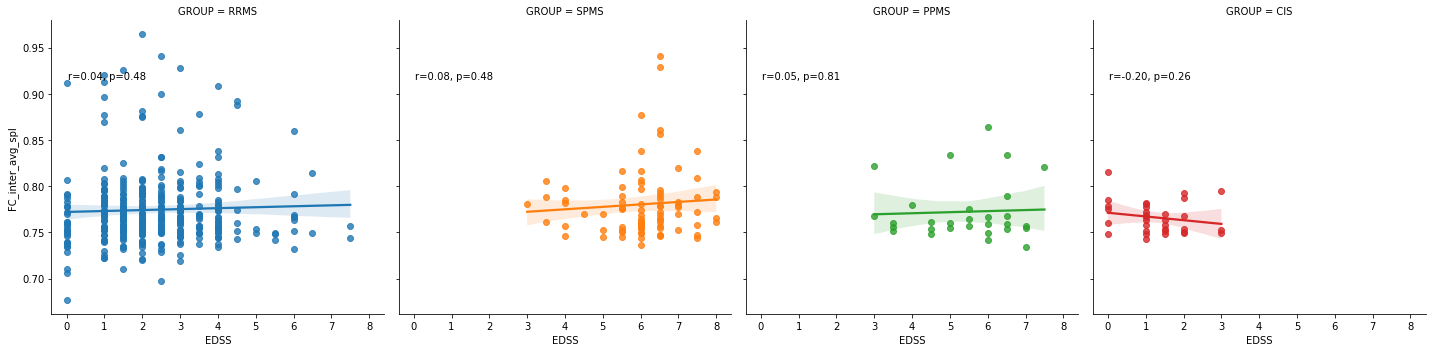

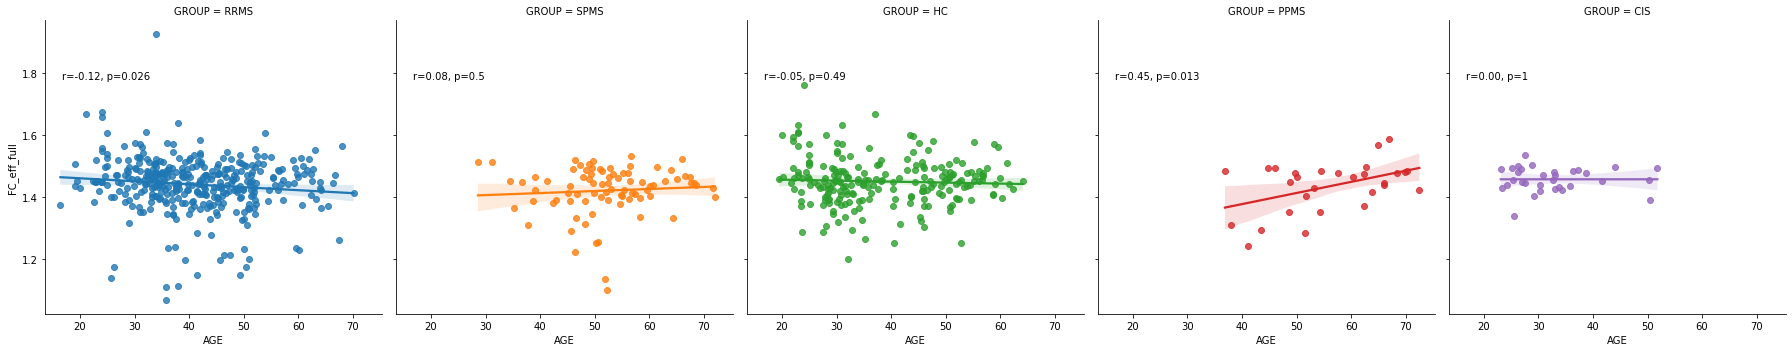

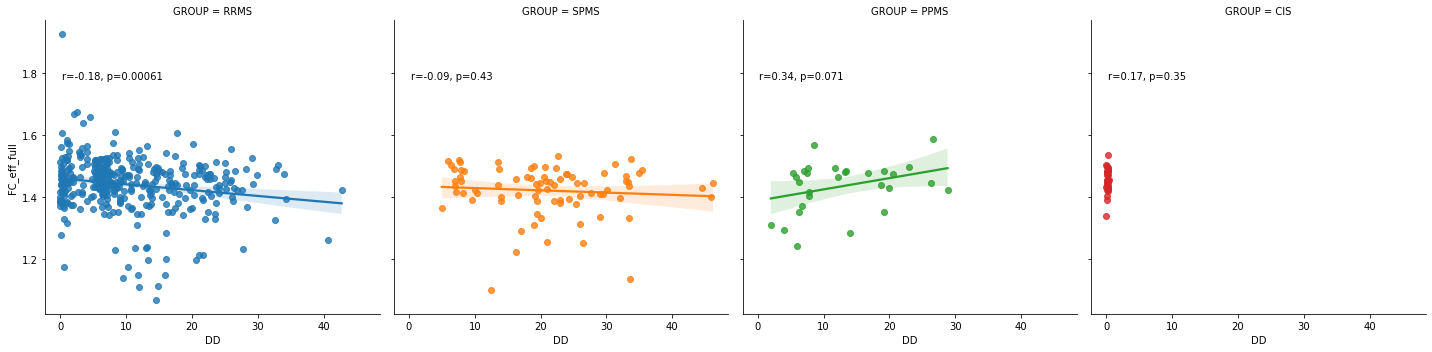

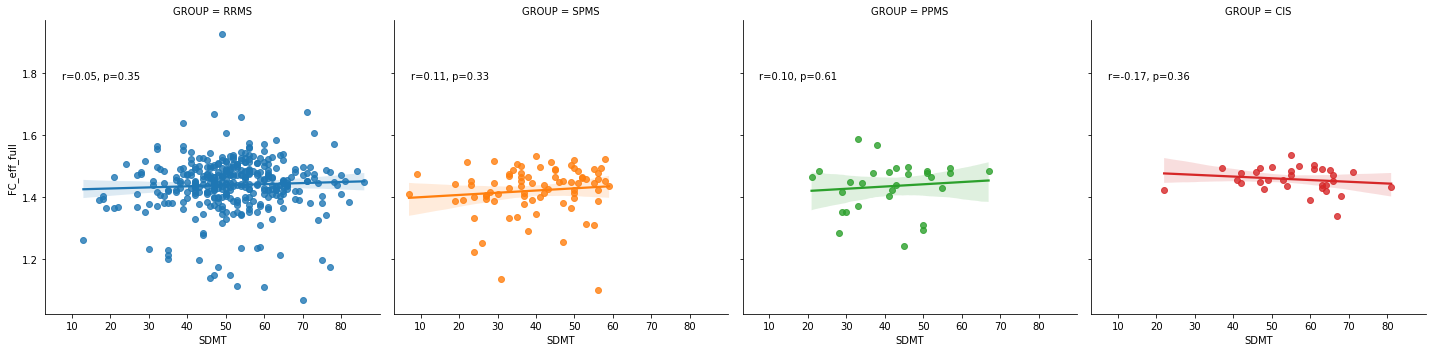

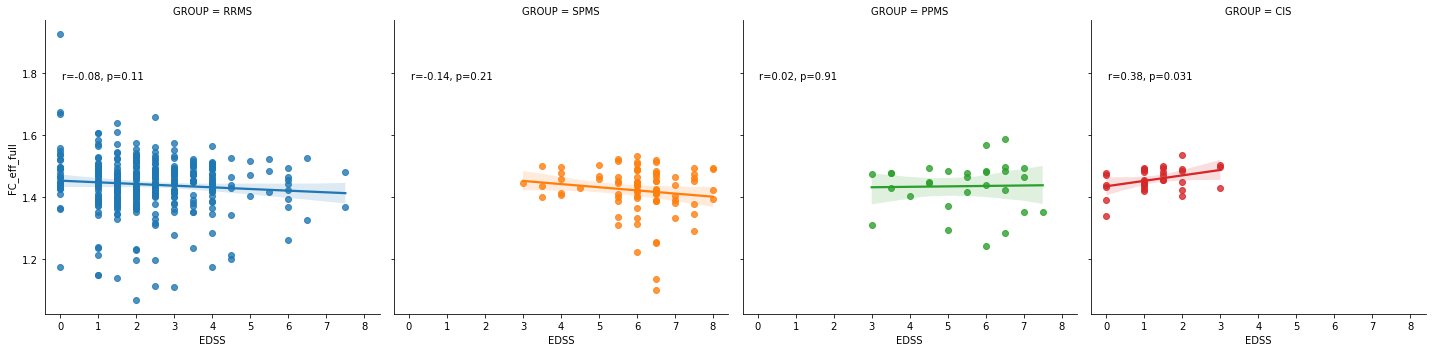

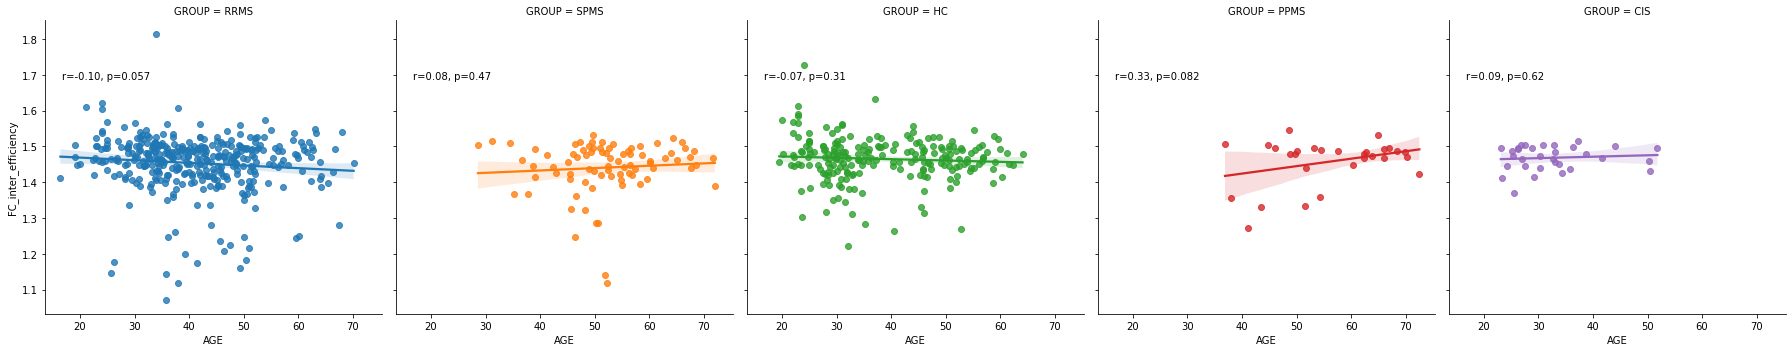

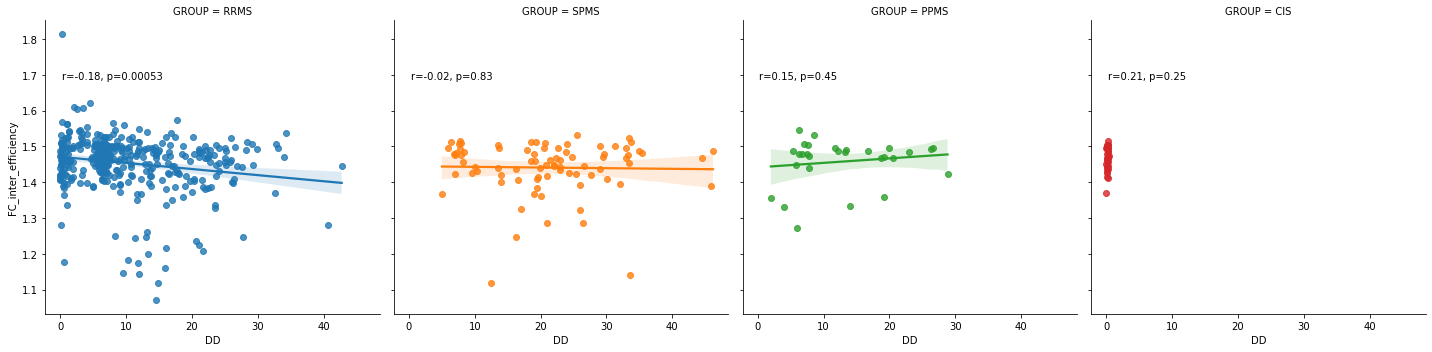

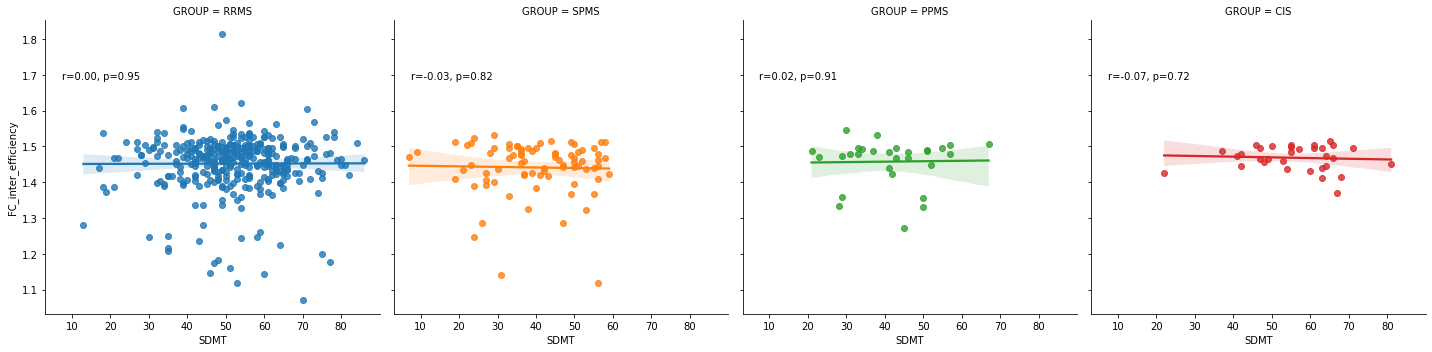

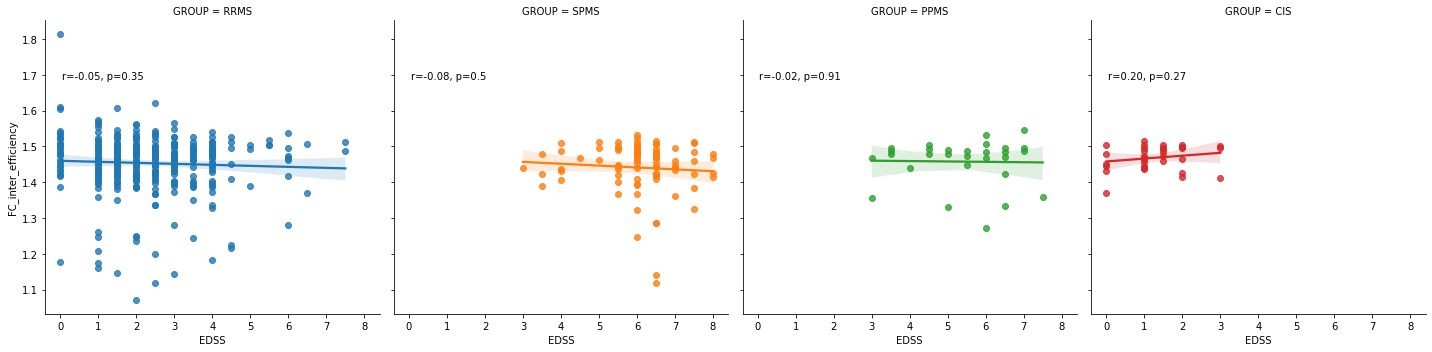

In [14]:
## REGRESSION
# Compare each CC to SDMT and EDSS. 
from scipy import stats

variable_to_plot = "Test" # needs to change every time

def annotate(data, **kws):
    r, p = stats.pearsonr(data[variable_to_plot], data[f"{cc}"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)


list_of_values = ["Full_hemis", "SC_inter_avg_spl", "FC_spl_full", "FC_inter_avg_spl", "FC_eff_full", "FC_inter_efficiency"]
for cc in list_of_values:

    for variable_to_plot in ["AGE", "DD", "SDMT", "EDSS"]:

        data_to_plot = df_merged
        if variable_to_plot in ["DD", "SDMT", "EDSS"]:
            data_to_plot = df_merged[df_merged.GROUP != "HC"].dropna(subset=[variable_to_plot])

        # AGE
        g = sns.lmplot(data=data_to_plot, x=variable_to_plot, y=f"{cc}", col="GROUP", hue="GROUP")
        g.map_dataframe(annotate)



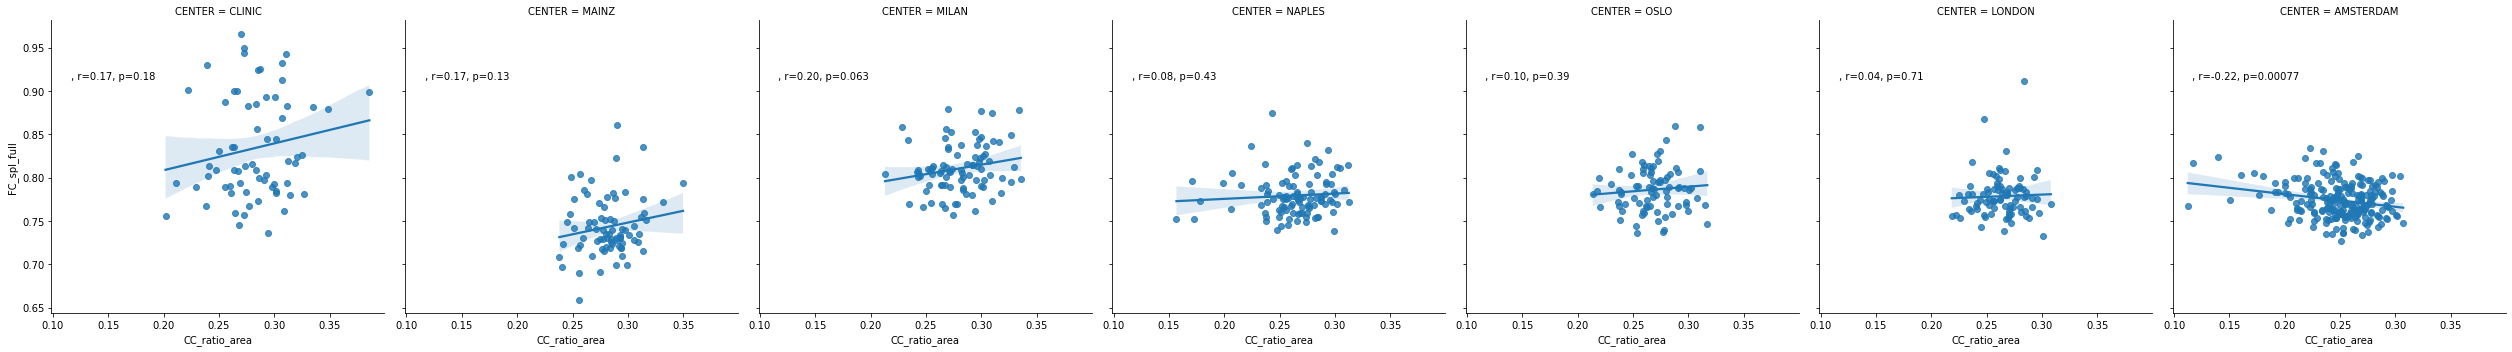

In [20]:
def annotate(col1, col2, data, multihue=False, **kwargs):
    if len(data[col1]) >= 2 or len(data[col2]) >= 2:
        r, p = stats.pearsonr(data[col1], data[col2])
        ax = plt.gca()

        # hardcoded, udpate if working with other labels
        x_pos = 0.05
        if multihue:
            label = kwargs["label"]
            dict_of_labels = {"CIS": 0, "RRMS": 1, "PMS": 2, 'MS':0, 'HC':1}
            y_pos = 0.8 - dict_of_labels[kwargs["label"]]*0.05
        else:
            label =  " "
            y_pos = 0.8
        
        ax.text(x_pos, y_pos, f'{label}, ' + 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)

# Sum all values of CC and divide by ICV
# average intrahemis connectivity
# plot one against the other

list_of_values = ["Full_hemis", "SC_inter_avg_spl", "FC_spl_full", "FC_inter_avg_spl", "FC_eff_full", "FC_inter_efficiency"]


df_merged["Full_CC"] = df_merged["CC_Posterior"] + df_merged["CC_Mid_Posterior"] + df_merged["CC_Central"] + df_merged["CC_Mid_Anterior"] + df_merged["CC_Anterior"]
df_merged["Comm_ratio_approx"] = ( df_merged["CC_Posterior"] + df_merged["CC_Mid_Posterior"] + df_merged["CC_Central"] + df_merged["CC_Mid_Anterior"] + df_merged["CC_Anterior"] ) / df_merged["EstimatedTotalIntraCranialVol"]
df_merged["CC_ratio_area"] = np.sqrt(df_merged["CC_Sag_area"]) / (df_merged["BrainSegVol"]**(1./3.))

# both 
df_merged["Full_hemis"] = ( df_merged["SC_L_avg_spl"] + df_merged["SC_R_avg_spl"] ) / 2
df_merged_cl["Full_hemis"] = ( df_merged_cl["SC_L_avg_spl"] + df_merged_cl["SC_R_avg_spl"] ) / 2

results = smf.ols(f'Full_hemis ~ C(CENTER)', data=df_merged).fit()
df_merged[f"Full_hemis_C"] = results.resid

results = smf.ols(f'Comm_ratio ~ C(CENTER)', data=df_merged).fit()
df_merged[f"Comm_ratio_C"] = results.resid

variable_to_plot = "CC_ratio_area"
cc = "FC_spl_full"
df_merged['disease'] = np.where((df_merged['GROUP']== 'HC'), "HC", "MS")
df_merged_hc = df_merged[df_merged.disease == "HC"]
g = sns.lmplot(data=df_merged, x=variable_to_plot, y=f"{cc}", col="CENTER")
g.map_dataframe(annotate, variable_to_plot, cc, multihue=False)


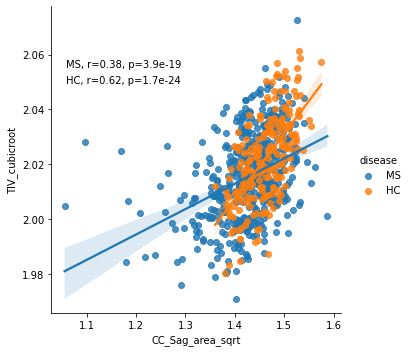

In [21]:
df_merged["CC_Sag_area_sqrt"] = np.log10(np.sqrt(df_merged["CC_Sag_area"]))
df_merged["TIV_cubicroot"] = np.log10(df_merged["BrainSegVol"]**(1./3.))

g = sns.lmplot(data=df_merged, x="CC_Sag_area_sqrt", y="TIV_cubicroot", hue="disease")
g.map_dataframe(annotate, "CC_Sag_area_sqrt", "TIV_cubicroot", multihue=True)


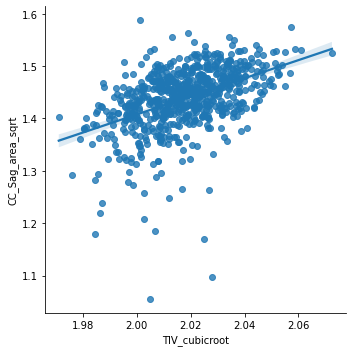

In [17]:
g = sns.lmplot(data=df_merged, x="TIV_cubicroot", y="CC_Sag_area_sqrt")

TypeError: annotate() missing 2 required positional arguments: 'col1' and 'col2'

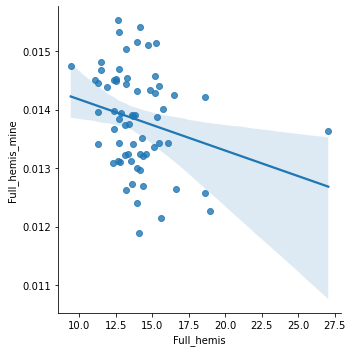

In [18]:
variable_to_plot = "Full_hemis"
cc = "Full_hemis_mine"
df_merged_cl['Full_hemis_mine'] = df_merged[df_merged.CENTER=="CLINIC"]["Full_hemis"]
g = sns.lmplot(data=df_merged_cl, x=variable_to_plot, y=f"{cc}", robust=True)
g.map_dataframe(annotate)
